You may make some explorations here.

In [2]:
import numpy as np
from struct import unpack
import gzip
import matplotlib.pyplot as plt

In [ ]:
path = r'.\dataset\MNIST\train-images-idx3-ubyte.gz'

with gzip.open(path, 'rb') as f:
        magic, num, rows, cols = unpack('>4I', f.read(16))
        imgs=np.frombuffer(f.read(), dtype=np.uint8).reshape(num, 28*28)

print(magic)
print(num)
print(rows)
print(cols)
print(imgs[0])

2051
60000
28
28
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241  

: 

In [4]:
imgs[0].max()

255

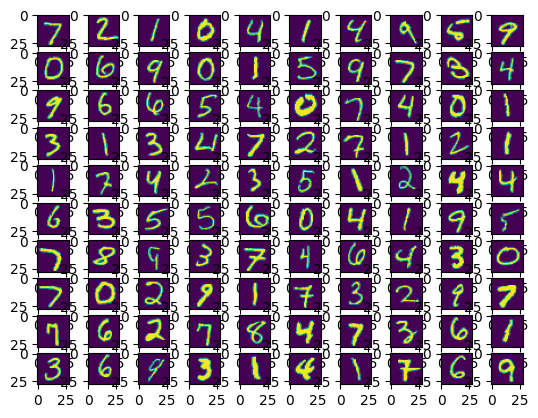

In [14]:
for i in range(100):
    plt.subplot(10,10, i + 1)
    plt.imshow(imgs[i].reshape(rows, cols))

In [15]:
path = r'.\dataset\MNIST\t10k-labels-idx1-ubyte.gz'

with gzip.open(path, 'rb') as f:
        magic, num = unpack('>2I', f.read(8))
        lab = np.frombuffer(f.read(), dtype=np.uint8)

In [16]:
print(lab.shape)
print(lab[0:100])

(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


In [4]:
np.matmul(np.zeros((2,3)), np.zeros((3,1))).shape

(2, 1)

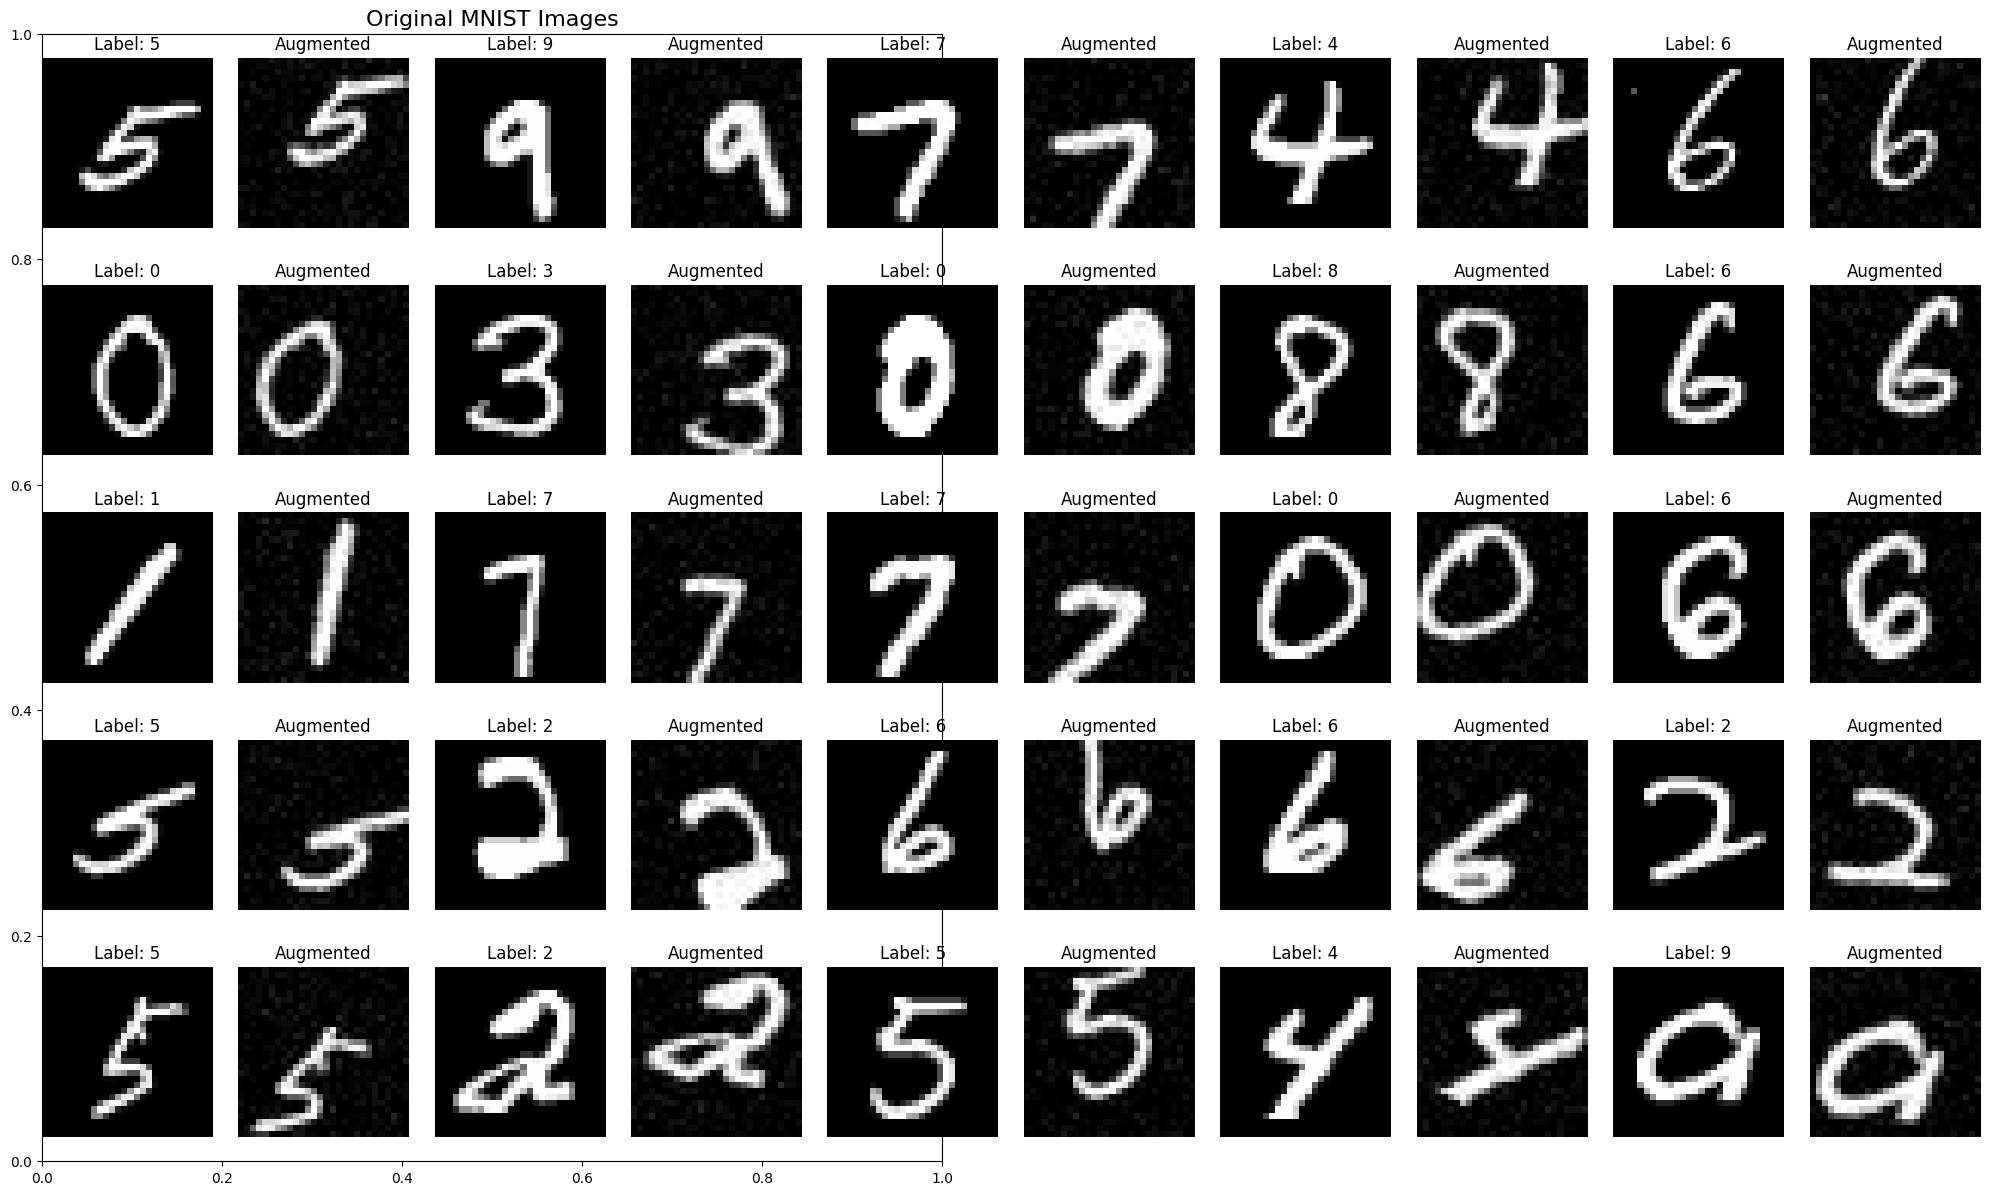

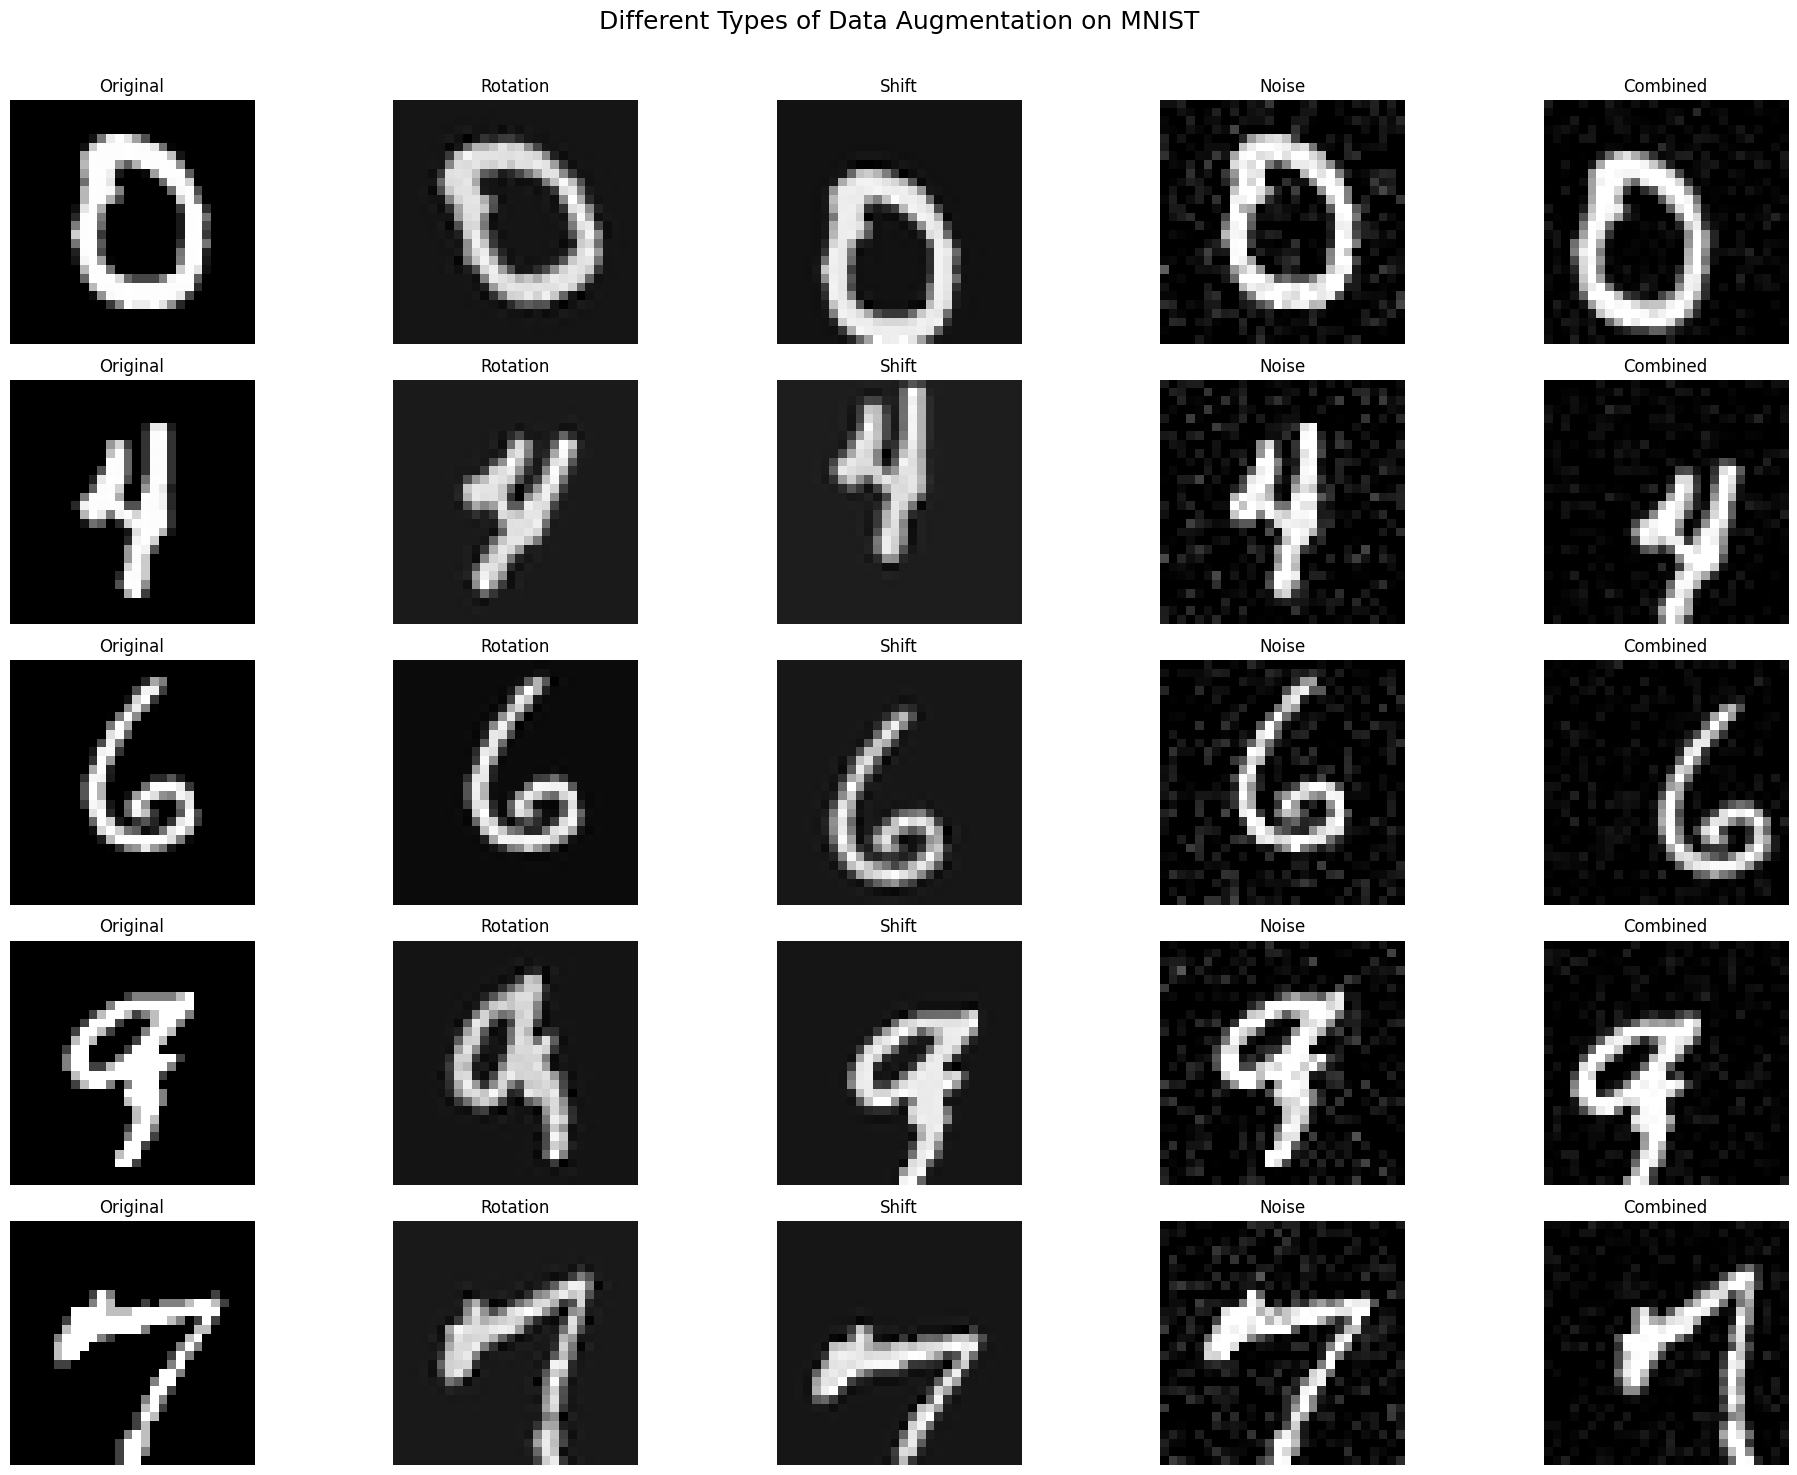

In [2]:
import numpy as np
from struct import unpack
import gzip
import matplotlib.pyplot as plt
from scipy.ndimage import rotate, shift

# Load MNIST dataset
train_images_path = r'.\dataset\MNIST\train-images-idx3-ubyte.gz'
train_labels_path = r'.\dataset\MNIST\train-labels-idx1-ubyte.gz'

# Load images
with gzip.open(train_images_path, 'rb') as f:
    magic, num, rows, cols = unpack('>4I', f.read(16))
    train_imgs = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows*cols)

# Load labels
with gzip.open(train_labels_path, 'rb') as f:
    magic, num = unpack('>2I', f.read(8))
    train_labs = np.frombuffer(f.read(), dtype=np.uint8)

# Normalize data
train_imgs = train_imgs / 255.0

# Select 25 images for visualization
num_samples = 25
selected_indices = np.random.choice(len(train_imgs), num_samples, replace=False)
selected_images = train_imgs[selected_indices]
selected_labels = train_labs[selected_indices]

# Apply data augmentation
def augment_images(images, augmentation_type="rotation"):
    augmented = []
    
    for img in images:
        img_2d = img.reshape(28, 28)
        
        if augmentation_type == "rotation":
            # Random rotation between -15 and 15 degrees
            angle = np.random.uniform(-30, 30)
            img_augmented = rotate(img_2d, angle, reshape=False, mode='nearest')
            
        elif augmentation_type == "shift":
            # Random shift between -2 and 2 pixels
            dx, dy = np.random.uniform(-5, 5, 2)
            img_augmented = shift(img_2d, [dy, dx], mode='nearest')
            
        elif augmentation_type == "noise":
            # Add random noise
            noise_level = 0.1
            noise = np.random.normal(0, noise_level, img_2d.shape)
            img_augmented = np.clip(img_2d + noise, 0, 1)
            
        elif augmentation_type == "combined":
            # Apply multiple augmentations
            angle = np.random.uniform(-30, 30)
            img_rotated = rotate(img_2d, angle, reshape=False, mode='nearest')
            
            dx, dy = np.random.uniform(-5, 5, 2)
            img_shifted = shift(img_rotated, [dy, dx], mode='nearest')
            
            noise_level = 0.05
            noise = np.random.normal(0, noise_level, img_shifted.shape)
            img_augmented = np.clip(img_shifted + noise, 0, 1)
        else:
            img_augmented = img_2d
            
        augmented.append(img_augmented)
        
    return np.array(augmented)

# Create augmented versions of the selected images
augmented_images = augment_images(selected_images, "combined")

# Create a figure with two subplots (side by side)
plt.figure(figsize=(20, 12))

# Left subplot for original images
plt.subplot(1, 2, 1)
plt.title("Original MNIST Images", fontsize=16)

# Create a 5x5 grid of original images
for i in range(num_samples):
    plt.subplot(5, 10, i*2 + 1)
    plt.imshow(selected_images[i].reshape(rows, cols), cmap='gray')
    plt.title(f"Label: {selected_labels[i]}")
    plt.axis('off')

# Right subplot for augmented images
for i in range(num_samples):
    plt.subplot(5, 10, i*2 + 2)
    plt.imshow(augmented_images[i], cmap='gray')
    plt.title("Augmented")
    plt.axis('off')

plt.tight_layout()
plt.savefig('mnist_augmentation_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Optional: Create a second visualization showing different augmentation types
plt.figure(figsize=(20, 15))
plt.suptitle("Different Types of Data Augmentation on MNIST", fontsize=18)

# Select 5 images for demonstration
demo_indices = np.random.choice(len(train_imgs), 5, replace=False)
demo_images = train_imgs[demo_indices]

augmentation_types = ["rotation", "shift", "noise", "combined"]

for i, img in enumerate(demo_images):
    # Original image
    plt.subplot(5, 5, i*5 + 1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    # Different augmentations
    for j, aug_type in enumerate(augmentation_types):
        augmented = augment_images([img], aug_type)[0]
        plt.subplot(5, 5, i*5 + j + 2)
        plt.imshow(augmented, cmap='gray')
        plt.title(aug_type.capitalize())
        plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig('mnist_augmentation_types.png', dpi=300, bbox_inches='tight')
plt.show()